1#pre process+EDA+feature selection
2#extract input n output cols
3#scale the values
4#train test split
5#train the model
6#evaluate the model/model selection
7#deploy the model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets AIML/placement.csv")

In [ ]:
#stored in dataframe
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [ ]:
df.shape

(100, 4)

In [ ]:
#checks if there is null. If yes there are missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
#PRE-PROCESSING

#locating first column,[row indexer, column indexer]
df1 = df.iloc[:,1:]

In [ ]:
df1.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


Text(0, 0.5, 'iq')

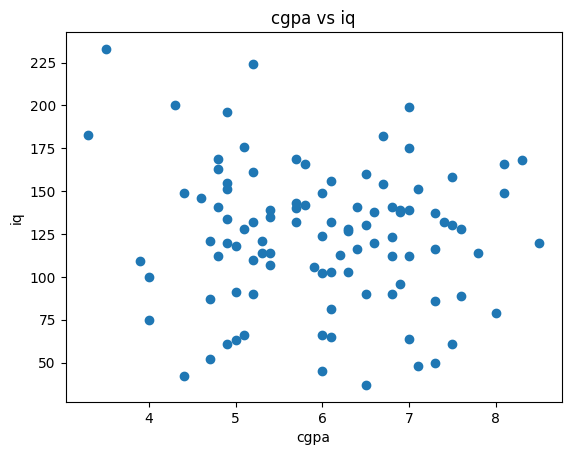

In [ ]:
#EDA

plt.scatter(df1["cgpa"], df1["iq"])
plt.title("cgpa vs iq")
plt.xlabel("cgpa")
plt.ylabel("iq")

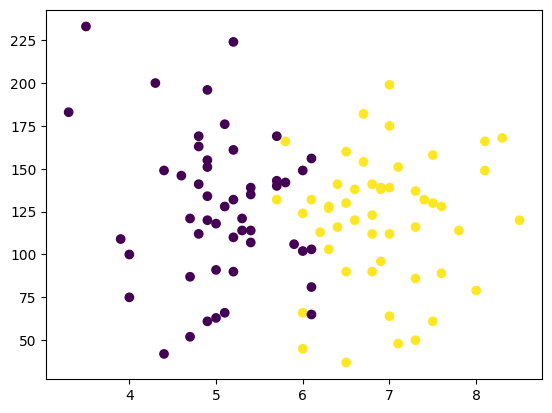

In [ ]:
plt.scatter(df1["cgpa"], df1["iq"], c = df1["placement"])

In [ ]:
#EXTRACT INPUT AND OUTPUT

# column 2 not included
x = df1.iloc[:,0:2]
# includes last column
y = df1.iloc[:,-1]

In [ ]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 0)

In [ ]:
X_train

,cgpa,iq
53,8.3,168.0
92,5.2,110.0
78,6.1,81.0
13,6.4,116.0
7,5.0,63.0
...,...,...
96,4.4,42.0
67,5.0,118.0
64,7.0,64.0
47,5.2,161.0


In [ ]:
X_test

,cgpa,iq
26,7.0,199.0
86,5.1,128.0
2,5.3,121.0
55,7.8,114.0
75,4.8,169.0
93,6.8,112.0
16,5.2,224.0
73,4.9,61.0
54,6.4,141.0
95,4.3,200.0


In [ ]:
y_train

,placement
53,1
92,0
78,0
13,1
7,0
...,...
96,0
67,0
64,1
47,0


In [ ]:
y_test

,placement
26,1
86,0
2,0
55,1
75,0
93,1
16,0
73,0
54,1
95,0


In [ ]:
#SCALING - fitting values between -1 to 1 range

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
X_train

array([[ 2.00308668e+00,  1.24073424e+00],
       [-7.16432461e-01, -2.90022729e-01],
       [ 7.31053532e-02, -1.05540121e+00],
       [ 3.36284625e-01, -1.31668559e-01],
       [-8.91885309e-01, -1.53046372e+00],
       [ 1.38900171e+00,  1.85039779e-01],
       [-9.79611733e-01, -2.60991131e-02],
       [-1.15506458e+00,  2.93248462e-04],
       [-1.46210706e-02,  7.39279372e-01],
       [ 7.31053532e-02,  9.24025903e-01],
       [ 6.87190320e-01,  5.28140479e-01],
       [-1.46210706e-02, -5.01161621e-01],
       [ 1.21354886e+00,  2.90609225e-01],
       [ 7.31053532e-02,  2.90609225e-01],
       [-1.46210706e-02, -1.45128664e+00],
       [ 5.11737472e-01,  4.48963395e-01],
       [-2.77800342e-01,  5.80925202e-01],
       [ 1.60831777e-01, -2.10845644e-01],
       [ 4.24011048e-01, -2.21666512e+00],
       [-9.79611733e-01,  8.97633541e-01],
       [ 7.74916744e-01,  4.75355756e-01],
       [-9.79611733e-01,  1.97972036e+00],
       [ 1.12582244e+00, -9.23439406e-01],
       [-1.

In [ ]:
X_test = sc.transform(X_test)
# we did not do ytest & ytrain as it is already in 0 to 1 range

In [ ]:
#TRAINING

from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
#MODEL TRAINING

clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# predicting model(y_pred = predicted value, y_test = actual value)
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [ ]:
y_test

,placement
26,1
86,0
2,0
55,1
75,0
93,1
16,0
73,0
54,1
95,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
#VISUALIZATION

from mlxtend.plotting import plot_decision_regions

<Axes: >

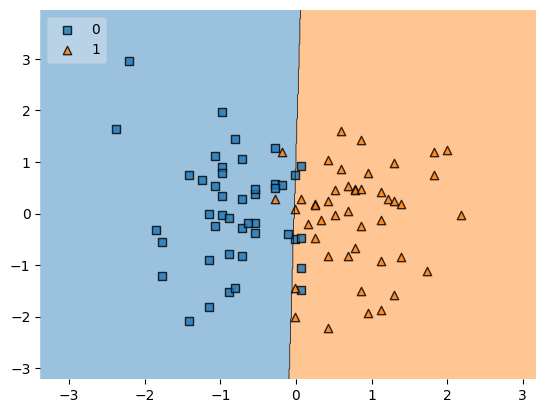

In [ ]:
plot_decision_regions(X_train,y_train.values, clf=clf, legend=2)

In [ ]:
# # model makes file and is deployed in system (saved)
import pickle

In [ ]:
pickle.dump(clf, open('model.pkl', 'wb'))